# The goal of this notebook is to load generated molecules and pass them through rd_filter, additionally calculating other properties. 

In [5]:
# Is this the right path?

%cd ..

/home/adam/Projects/hybrid-transformer


In [2]:
# Import the necessary libraries

import os
import argparse
import torch
import wandb

from hybrid_transformer.configs.task import TaskConfig
from hybrid_transformer.configs.model import ModelConfig
from hybrid_transformer.configs.trainer import TrainerConfig
from hybrid_transformer.configs.logger import LoggerConfig

from hybrid_transformer.utils.datasets.auto import AutoDataset
from hybrid_transformer.utils.tokenizers.auto import AutoTokenizer
from hybrid_transformer.models.auto import AutoModel
from hybrid_transformer.utils.loggers.wandb import WandbLogger

from hybrid_transformer.trainers.trainer import Trainer

from hybrid_transformer.utils.objectives.guacamol.objective import GUACAMOL_TASKS
from hybrid_transformer.utils.objectives.molecule_net.objective import MOLECULE_NET_REGRESSION_TASKS
from hybrid_transformer.models.prediction import PREDICTION_MODEL_CONFIGS

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Load the configuration files

# Paths to the configuration files
PATH_TO_TASK_CONFIG = './configs/tasks/guacamol/distribution_learning/config.json'
PATH_TO_MODEL_CONFIG = './configs/models/hybrid_transformer/config.json'
PATH_TO_TRAINER_CONFIG = './configs/trainers/pretrain/config.json'
# PATH_TO_LOGGER_CONFIG = ''

PATH_TO_MODEL_CKPT = './results/pretrain/hybrid_transformer/ckpt.pt'

# Load the configuration files
task_config = TaskConfig.from_pretrained(PATH_TO_TASK_CONFIG)
model_config = ModelConfig.from_pretrained(PATH_TO_MODEL_CONFIG)
trainer_config = TrainerConfig.from_pretrained(PATH_TO_TRAINER_CONFIG)
trainer_config.enable_save_checkpoint = False

# logger_config = LoggerConfig.from_pretrained(PATH_TO_LOGGER_CONFIG)
task_config.validate = False
# logger_config.wandb_log = False

In [7]:
# Auxiliary functions

def save_strings_to_file(strings, filename):
    with open(filename, 'w') as f:
        for s in strings:
            f.write(s + '\n')

def read_strings_from_file(filename):
    with open(filename, 'r') as f:
        strings = f.read().splitlines()
    return strings

def convert_strings_to_lists(strings):
    return [[s, f'MOL{i}'] for i, s in enumerate(strings)]

In [8]:
# Load the pre-trained model

tokenizer = AutoTokenizer.from_config(task_config)
model = AutoModel.from_config(model_config)
trainer = Trainer(
    config=trainer_config, model=model, train_dataset=None,
    eval_dataset=None, tokenizer=tokenizer, logger=None)
trainer.load_checkpoint(PATH_TO_MODEL_CKPT)
trainer._train_init()
trainer.model.eval()

number of parameters: 38.06M
tokens per iteration will be: 61,440
Using cuda device
Successfully loaded checkpoint from ./results/pretrain/hybrid_transformer/ckpt.pt...
Random seed set to 1337
num decayed parameter tensors: 63, with 38,115,840 parameters
num non-decayed parameter tensors: 25, with 12,800 parameters
using fused AdamW: True
Compiling model..


In [20]:
# Generate molecules and save them into a file
NUM_MOLECULES = 40
BATCH_SIZE = 8

generated_molecules = []
sampling_iters = NUM_MOLECULES // BATCH_SIZE + 1
for k in range(sampling_iters):
    idx = torch.ones(size=(sampling_iters, 1), device=trainer.device) * trainer.tokenizer.generate_token_id
    idx = idx.long()
    samples = trainer.model.generate(idx=idx, max_new_tokens=trainer.tokenizer.max_molecule_length)
    print(len(samples))
    generated_molecules.extend(samples)

6
6
6
6
6
6


In [15]:
with torch.no_grad():
    idx = torch.ones(size=(8, 1), device=trainer.device) * trainer.tokenizer.generate_token_id
    idx = idx.long()
    samples = trainer.model.generate(idx=idx, max_new_tokens=trainer.tokenizer.max_molecule_length)

In [23]:
len(generated_molecules)

36

In [21]:
sampling_iters

6

In [32]:
save_strings_to_file(molecules, 'generated_molecules.smi')

In [3]:
# Load the molecules and calculate their properties

In [4]:
# Filter the molecules

In [5]:
# Save the filtered molecules into a file along the calculated properties


In [24]:
trainer.model.device

AttributeError: 'HybridTransformerPreTrained' object has no attribute 'device'

In [9]:
my_list = read_strings_from_file('generated_molecules.smi')

In [10]:
my_list

['Cc1cc(N2CCOCC2)ccc1N1CC(C)(C)N(CC(N)=O)C1=O',
 'O=C1C(=Cc2ccc(OCCCBr)cc2)COc2ccc(OCCCBr)cc21',
 'COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(F)cc1',
 'OC(c1ccccc1)c1cc(Br)c2cccc(C(F)(F)F)c2n1',
 'COC1=NOC(C#CCCCCCC(O)(O)CO)C1',
 'CC(C)C1NC(=O)C(Cc2ccc(O)cc2)NC(=O)C(C(C)C)NCCOc2ccccc2CCCNC1=O',
 'Cc1cc(C)c(C#N)c(O)n1',
 'NC(=O)C1C2C=CC(C2)C1C(=O)NCc1ccccc1',
 'O=C(Nc1ccc(S(=O)(=O)Nc2nccs2)cc1)c1ccccc1',
 'COC(=O)c1ccc([N+](=O)[O-])c(S(=O)(=O)Cc2ccccc2F)c1',
 'CCC(=CC1CCC(C2CC=C3C4CC(O)C5(O)CC(O)CCC5(C)C4CCC32C)CC1)C(C)C',
 'COc1cccc(-c2noc(CN3CCN(c4ccc(F)cc4)CC3)n2)c1OC',
 'Cc1ccc(C(=O)Nc2ccccc2N(C)Cc2ccccc2)cc1C(=O)Nc1ccc(C#N)cc1',
 'O=C(CCCCCCCCCc1ccccc1)NCCCCCCCCc1c[nH]cn1',
 'COc1ccc2[nH]c(=O)c(-c3ccc(N(C)C)cc3)cc2c1',
 'Cc1ccc(-c2nn(-c3cccc(Cl)c3)c3ncnc(N)c23)cc1',
 'COc1c(C(O)C2CCCCC2)ccc2c1-c1n(c(=O)cc3ncccc31)CC2',
 'CC(=NNc1nc(-c2ccc(C)cc2)cs1)c1ccccc1Cl',
 'CCOc1ccc(C=NOCC(=O)Nc2cccc(C(F)(F)F)c2)cc1',
 'CC12NC(Cc3ccc(O)cc31)c1ccccc12',
 'CSc1nnc(C2CC(S)CN2S(=O)(=O)c2ccccc2F)n1C(

In [11]:
validity = sum(tokenizer.is_valid_smiles(generated_molecules)) / len(tokenizer.is_valid_smiles(generated_molecules))
validity

ZeroDivisionError: division by zero

In [12]:
tokenizer.

SyntaxError: invalid syntax (319190680.py, line 1)

In [13]:
import sys
from rdkit import Chem
from rdkit.Chem.Descriptors import MolWt, MolLogP, NumHDonors, NumHAcceptors, TPSA
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
import multiprocessing as mp
from multiprocessing import Pool
import time
import pandas as pd
import os
import json
from docopt import docopt



In [14]:
path_to_alert_collection = './hybrid_transformer/utils/objectives/rd_filter/data/alert_collection.csv'
path_to_rules = './hybrid_transformer/utils/objectives/rd_filter/data/rules.json'
path_to_input_data = './hybrid_transformer/utils/objectives/rd_filter/data/HIV.smi'

num_cores = mp.cpu_count()
rf = RDFilters(path_to_alert_collection)
rule_dict = read_rules(path_to_rules)
p = Pool(num_cores)

In [15]:
# input_data = [x.split() for x in open(path_to_input_data)]
# input_data = [x for x in input_data if len(x) == 2]

input_data = convert_strings_to_lists(read_strings_from_file('generated_molecules.smi'))

rule_list = [x.replace("Rule_", "") for x in rule_dict.keys() if x.startswith("Rule") and rule_dict[x]]
rule_str = " and ".join(rule_list)
rf.build_rule_list(rule_list)
res = list(p.map(rf.evaluate, input_data))
df = pd.DataFrame(res, columns=["SMILES", "NAME", "FILTER", "MW", "LogP", "HBD", "HBA", "TPSA", "Rot"])

In [16]:
df

SMILES   NAME  \
0         Cc1cc(N2CCOCC2)ccc1N1CC(C)(C)N(CC(N)=O)C1=O   MOL0   
1        O=C1C(=Cc2ccc(OCCCBr)cc2)COc2ccc(OCCCBr)cc21   MOL1   
2       COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(F)cc1   MOL2   
3            OC(c1ccccc1)c1cc(Br)c2cccc(C(F)(F)F)c2n1   MOL3   
4                       COC1=NOC(C#CCCCCCC(O)(O)CO)C1   MOL4   
..                                                ...    ...   
76  Cc1cc(C)c(NS(=O)(=O)c2ccc(F)cc2)c(C)c1NS(=O)(=...  MOL76   
77  O=C(CS(=O)(=O)c1cn(CC(=O)N2CCOCC2)c2ccccc12)NC...  MOL77   
78                         CC(C#N)c1c(F)cccc1C(F)(F)F  MOL78   
79  O=C(C=Cc1ccc(O)cc1)NCCCCCN1CCC(c2c[nH]c3ccccc2...  MOL79   
80                              O=Cc1cncc(-c2cccs2)c1  MOL80   

                            FILTER       MW     LogP  HBD  HBA   TPSA  Rot  
0                               OK  346.431  1.33752    1    4  79.11    4  
1        Filter26_alkyl_halide > 0  510.222  5.67290    0    4  44.76    9  
2                               OK  341.338  3.41302    1    4  68.53    4  
3                               OK  382.179  5.09780    1    2  33.12    2  
4                               OK  271.313  0.36230    3    6  91.51    6  
..                             ...      ...      ...  ...  ...    ...  ...  
76                              OK  482.986  5.00596    2    4  92.34    6  
77                              OK  469.563  1.63270    1    6  97.71    8  
78                              OK  217.165  3.47158    0    1  23.79    1  
79  Filter44_michael_acceptor2 > 0  431.580  5.05280    3    3  68.36    9  
80           Filter38_aldehyde > 0  189.239  2.62260    0    3  29.96    2  

[81 rows x 9 columns]

In [17]:
df_ok = df[
            (df.FILTER == "OK") &
            df.MW.between(*rule_dict["MW"]) &
            df.LogP.between(*rule_dict["LogP"]) &
            df.HBD.between(*rule_dict["HBD"]) &
            df.HBA.between(*rule_dict["HBA"]) &
            df.TPSA.between(*rule_dict["TPSA"]) &
            df.Rot.between(*rule_dict["Rot"])
            ]

num_input_rows = df.shape[0]
num_output_rows = df_ok.shape[0]
fraction_passed = "%.1f" % (num_output_rows / num_input_rows * 100.0)
print(f"{num_output_rows} of {num_input_rows} passed filters {fraction_passed}%", file=sys.stderr)


38 of 81 passed filters 46.9%


In [18]:
def convert_strings_to_lists(strings):
    return [[s, f'MOL{i}'] for i, s in enumerate(strings)]
    
convert_strings_to_lists(my_list)

[['Cc1cc(N2CCOCC2)ccc1N1CC(C)(C)N(CC(N)=O)C1=O', 'MOL0'],
 ['O=C1C(=Cc2ccc(OCCCBr)cc2)COc2ccc(OCCCBr)cc21', 'MOL1'],
 ['COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(F)cc1', 'MOL2'],
 ['OC(c1ccccc1)c1cc(Br)c2cccc(C(F)(F)F)c2n1', 'MOL3'],
 ['COC1=NOC(C#CCCCCCC(O)(O)CO)C1', 'MOL4'],
 ['CC(C)C1NC(=O)C(Cc2ccc(O)cc2)NC(=O)C(C(C)C)NCCOc2ccccc2CCCNC1=O', 'MOL5'],
 ['Cc1cc(C)c(C#N)c(O)n1', 'MOL6'],
 ['NC(=O)C1C2C=CC(C2)C1C(=O)NCc1ccccc1', 'MOL7'],
 ['O=C(Nc1ccc(S(=O)(=O)Nc2nccs2)cc1)c1ccccc1', 'MOL8'],
 ['COC(=O)c1ccc([N+](=O)[O-])c(S(=O)(=O)Cc2ccccc2F)c1', 'MOL9'],
 ['CCC(=CC1CCC(C2CC=C3C4CC(O)C5(O)CC(O)CCC5(C)C4CCC32C)CC1)C(C)C', 'MOL10'],
 ['COc1cccc(-c2noc(CN3CCN(c4ccc(F)cc4)CC3)n2)c1OC', 'MOL11'],
 ['Cc1ccc(C(=O)Nc2ccccc2N(C)Cc2ccccc2)cc1C(=O)Nc1ccc(C#N)cc1', 'MOL12'],
 ['O=C(CCCCCCCCCc1ccccc1)NCCCCCCCCc1c[nH]cn1', 'MOL13'],
 ['COc1ccc2[nH]c(=O)c(-c3ccc(N(C)C)cc3)cc2c1', 'MOL14'],
 ['Cc1ccc(-c2nn(-c3cccc(Cl)c3)c3ncnc(N)c23)cc1', 'MOL15'],
 ['COc1c(C(O)C2CCCCC2)ccc2c1-c1n(c(=O)cc3ncccc31)CC2', '

In [19]:

    if cmd_input.get("template"):
        template_output_file = cmd_input.get("--out")
        default_rule_template(rf.get_alert_sets(), template_output_file)

    elif cmd_input.get("filter"):
        input_file_name = cmd_input.get("--in")
        rules_file_name = cmd_input.get("--rules") or pkg_resources.resource_filename('rd_filters', "data/rules.json")
        rules_file_path = get_config_file(rules_file_name, "FILTER_RULES_DATA")
        prefix_name = cmd_input.get("--prefix")
        num_cores = cmd_input.get("--np") or mp.cpu_count()
        num_cores = int(num_cores)


        p = Pool(num_cores)
        input_data = [x.split() for x in open(input_file_name)]
        input_data = [x for x in input_data if len(x) == 2]

        rule_list = [x.replace("Rule_", "") for x in rule_dict.keys() if x.startswith("Rule") and rule_dict[x]]
        rule_str = " and ".join(rule_list)
        print(f"Using alerts from {rule_str}", file=sys.stderr)
        rf.build_rule_list(rule_list)
        res = list(p.map(rf.evaluate, input_data))
        df = pd.DataFrame(res, columns=["SMILES", "NAME", "FILTER", "MW", "LogP", "HBD", "HBA", "TPSA", "Rot"])
        df_ok = df[
            (df.FILTER == "OK") &
            df.MW.between(*rule_dict["MW"]) &
            df.LogP.between(*rule_dict["LogP"]) &
            df.HBD.between(*rule_dict["HBD"]) &
            df.HBA.between(*rule_dict["HBA"]) &
            df.TPSA.between(*rule_dict["TPSA"]) &
            df.Rot.between(*rule_dict["Rot"])
            ]
        output_smiles_file = prefix_name + ".smi"
        output_csv_file = prefix_name + ".csv"
        df_ok[["SMILES", "NAME"]].to_csv(f"{output_smiles_file}", sep=" ", index=False, header=False)
        print(f"Wrote SMILES for molecules passing filters to {output_smiles_file}", file=sys.stderr)
        df.to_csv(f"{prefix_name}.csv", index=False)
        print(f"Wrote detailed data to {output_csv_file}", file=sys.stderr)

        num_input_rows = df.shape[0]
        num_output_rows = df_ok.shape[0]
        fraction_passed = "%.1f" % (num_output_rows / num_input_rows * 100.0)
        print(f"{num_output_rows} of {num_input_rows} passed filters {fraction_passed}%", file=sys.stderr)
        elapsed_time = "%.2f" % (time.time() - start_time)
        print(f"Elapsed time {elapsed_time} seconds", file=sys.stderr)

NameError: name 'cmd_input' is not defined

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograms(vectors, captions, filename = None):
    plt.figure()
    for vector, caption in zip(vectors, captions):
        plt.hist(vector, alpha=0.5, label=caption)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histograms of Properties')
    plt.legend(loc='upper right')
    if filename:
        plt.savefig(filename, format='pdf')
    else:
        plt.show()
    plt.show()
    plt.close()

In [24]:
vectors = [df_ok.MW, df_ok.LogP, df_ok.HBD, df_ok.HBA, df_ok.TPSA, df_ok.Rot]

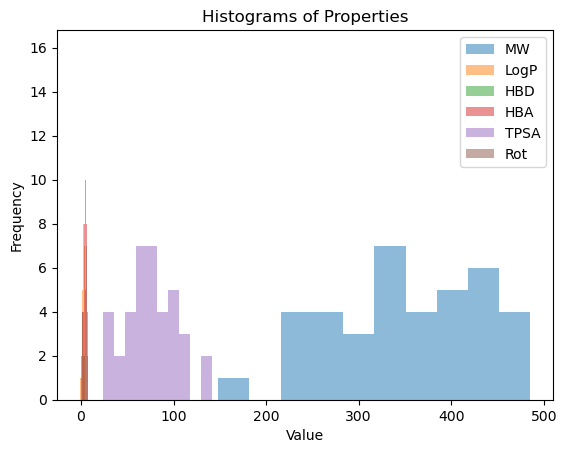

In [25]:
plot_histograms(vectors, ['MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'Rot'])

# Filtering

In [127]:
import random
import multiprocessing as mp
import pandas as pd
from multiprocessing import Pool
from hybrid_transformer.utils.objectives.rd_filter.rd_filters import RDFilters, read_rules
from guacamol.utils.chemistry import is_valid
from rdkit.Chem import MolFromSmiles, MolToSmiles
from rdkit.Chem.Descriptors import ExactMolWt
import numpy as np

def load_data_for_rd_filtering(
        path_to_input_data: str,
        path_to_alert_collection: str = './hybrid_transformer/utils/objectives/rd_filter/data/alert_collection.csv',
        path_to_rules: str = './hybrid_transformer/utils/objectives/rd_filter/data/rules.json',
        seed: int = 1337
):
    random.seed(seed)

    smiles = read_strings_from_file(path_to_input_data)
    if len(smiles) > 10000:
        smiles = random.sample(smiles, 10000)
    
    num_cores = mp.cpu_count()
    rf = RDFilters(path_to_alert_collection)
    rule_dict = read_rules(path_to_rules)
    p = Pool(num_cores)
    
    input_data = convert_strings_to_lists(smiles)
    
    rule_list = [x.replace("Rule_", "") for x in rule_dict.keys() if x.startswith("Rule") and rule_dict[x]]
    rule_str = " and ".join(rule_list)
    rf.build_rule_list(rule_list)
    res = list(p.map(rf.evaluate, input_data))
    df = pd.DataFrame(res, columns=["SMILES", "NAME", "FILTER", "MW", "LogP", "HBD", "HBA", "TPSA", "Rot"])
    df["QED"] = [smile_to_QED(smiles) if is_valid(smiles) else np.nan for smiles in df.SMILES]
    df["SA"] = [smile_to_sa(smiles) if is_valid(smiles) else np.nan for smiles in df.SMILES]
    df["PenalizedLogP"] = [smile_to_penalized_logP(smiles) if is_valid(smiles) else np.nan for smiles in df.SMILES]
    df["Length"] = [len(smiles) for smiles in df.SMILES]
    df_ok = df[
            (df.FILTER == "OK") &
            df.MW.between(*rule_dict["MW"]) &
            df.LogP.between(*rule_dict["LogP"]) &
            df.HBD.between(*rule_dict["HBD"]) &
            df.HBA.between(*rule_dict["HBA"]) &
            df.TPSA.between(*rule_dict["TPSA"]) &
            df.Rot.between(*rule_dict["Rot"])
            ]
    num_input_rows = df.shape[0]
    num_output_rows = df_ok.shape[0]
    fraction_passed = "%.1f" % (num_output_rows / num_input_rows * 100.0)
    print(f"{num_output_rows} of {num_input_rows} passed filters {fraction_passed}%", file=sys.stderr)
    is_valid_smiles = [is_valid(smiles) for smiles in df.SMILES]
    df_valid = df[is_valid_smiles]
    df_summary = df_valid[["MW", "TPSA", "QED", "SA", "PenalizedLogP", "Length"]].describe()
    return df_ok, df, df_summary

## Test data

In [128]:

# Load test molecules

PATH_TO_TEST_DATA = './data/guacamol/test/smiles.txt'
df_ok, df, df_summary = load_data_for_rd_filtering(PATH_TO_TEST_DATA)


5428 of 10000 passed filters 54.3%


In [129]:
df_summary

MW          TPSA           QED            SA  PenalizedLogP  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean     395.047777     80.127970      0.557059      2.897537       0.453383   
std      108.088240     37.805594      0.212446      0.814749       4.452282   
min      102.049000      0.000000      0.022404      1.253505     -95.958394   
25%      322.336250     55.130000      0.400215      2.330559      -0.008464   
50%      384.777500     75.630000      0.570837      2.708792       1.170584   
75%      456.478000     98.425000      0.732043      3.274023       2.071864   
max      922.786000    396.440000      0.947501      7.987221       6.248091   

             Length  
count  10000.000000  
mean      47.443200  
std       14.085546  
min       10.000000  
25%       38.000000  
50%       46.000000  
75%       56.000000  
max      100.000000

In [130]:
# Load test molecules

PATH_TO_JT_DATA = './generated_joint_transformer.smi'
df_ok, df, df_summary = load_data_for_rd_filtering(PATH_TO_JT_DATA)


5329 of 10000 passed filters 53.3%


In [131]:
df_summary

MW         TPSA          QED           SA  PenalizedLogP  \
count  9891.000000  9891.000000  9891.000000  9891.000000    9891.000000   
mean    399.836055    80.876639     0.553497     2.834507       0.640850   
std     110.492932    38.035857     0.214702     0.781313       4.030826   
min      36.461000     0.000000     0.018806     1.200653    -102.493626   
25%     324.393500    55.840000     0.393230     2.291084       0.146145   
50%     388.253000    75.710000     0.569862     2.659638       1.251134   
75%     461.585500    99.240000     0.728435     3.176139       2.147177   
max    1034.508000   353.900000     0.947682     7.962685       7.536385   

            Length  
count  9891.000000  
mean     47.940754  
std      14.274095  
min       2.000000  
25%      38.000000  
50%      46.000000  
75%      56.000000  
max     117.000000

In [132]:
# Load test molecules

PATH_TO_GPT_DATA = './generated_gpt.smi'
df_ok, df, df_summary = load_data_for_rd_filtering(PATH_TO_GPT_DATA)


5317 of 10000 passed filters 53.2%


In [133]:
df_summary

MW         TPSA          QED           SA  PenalizedLogP  \
count  9909.000000  9909.000000  9909.000000  9909.000000    9909.000000   
mean    401.317017    81.373779     0.548675     2.879342       0.547839   
std     109.485255    38.641512     0.215646     0.798298       4.133064   
min      88.150000     0.000000     0.016990     1.200653     -85.674748   
25%     327.775000    55.630000     0.385894     2.326949       0.068278   
50%     390.556000    75.760000     0.564986     2.695133       1.209264   
75%     463.544000    99.880000     0.725052     3.243893       2.122374   
max    1182.319000   352.040000     0.947257     7.987767      10.108286   

            Length  
count  9909.000000  
mean     48.062368  
std      14.081843  
min       8.000000  
25%      38.000000  
50%      47.000000  
75%      56.000000  
max     105.000000